In [2]:
from community_knapsack import *
from evaluation import evaluation
import random

In [3]:
# The algorithms to use for this evaluation:
exact_algorithms = [
    PBSingleAlgorithm.MEMOIZATION,
    PBSingleAlgorithm.DYNAMIC_PROGRAMMING,
    PBSingleAlgorithm.BRANCH_AND_BOUND,
    PBSingleAlgorithm.ILP_SOLVER
]

approximation_algorithms = [
    PBSingleAlgorithm.GREEDY,
    PBSingleAlgorithm.RATIO_GREEDY,
    PBSingleAlgorithm.FPTAS,
    PBSingleAlgorithm.SIMULATED_ANNEALING,
    PBSingleAlgorithm.GENETIC_ALGORITHM
]

#### This notebook tests the scalability of the algorithms with a increasing maximum cost as a percentage of the budget:
---

In [4]:
# The boundaries of this evaluation:
num_projects = 50
num_voters = 3000
budget = 500_000

min_cost_fraction = 0.01

start_max_cost_fraction = 10
end_max_cost_fraction = 100
step_max_cost_fraction = 10

In [5]:
# Set the global x-axis for this evaluation:
x_axis = list(cost/100 for cost in range(start_max_cost_fraction, end_max_cost_fraction + 1, step_max_cost_fraction))

In [6]:
# Generate the problems using the evaluation tools:
problems = evaluation.generate_single_problems(
    num_project_bounds=[(num_projects, num_projects)],
    num_voters_bounds=[(num_voters, num_voters)],
    budget_bounds=[(budget, budget)],
    cost_bounds=[(min_cost_fraction * budget, cost * budget) for cost in x_axis]
)

In [7]:
# Obtain the exact results for this evaluation:
exact_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=exact_algorithms,
    timeout=125,
    max_fail=5,
    file_name='ext-changing-max-cost-fraction.json',
    output=True
)

Processing MEMOIZATION:
0
1
2
3
4
5
6
7
8
9
Processing DYNAMIC_PROGRAMMING:
0
1
2
3
4
5
6
7
8
9
Processing BRANCH_AND_BOUND:
0
1
2
3
4
5
6
7
8
9
Processing ILP_SOLVER:
0
1
2
3
4
5
6
7
8
9


In [8]:
# Obtain the exact results for this evaluation:
approximation_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=approximation_algorithms,
    timeout=125,
    max_fail=5,
    file_name='apx-changing-max-cost-fraction.json',
    output=True
)

Processing GREEDY:
0
1
2
3
4
5
6
7
8
9
Processing RATIO_GREEDY:
0
1
2
3
4
5
6
7
8
9
Processing FPTAS:
0
1
2
3
4
5
6
7
8
9
Processing SIMULATED_ANNEALING:
0
1
2
3
4
5
6
7
8
9
Processing GENETIC_ALGORITHM:
0
1
2
3
4
5
6
7
8
9


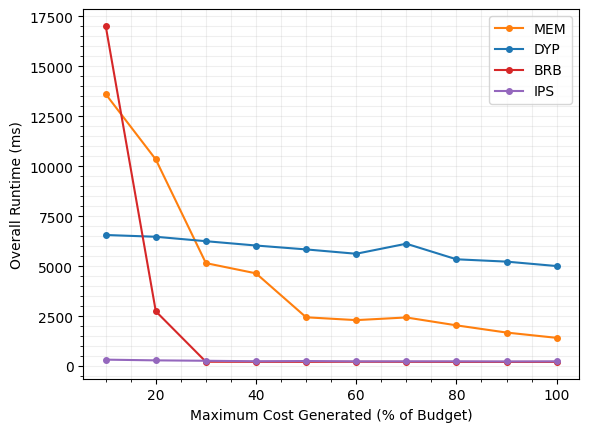

In [9]:
# Plot the exact algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=[x*100 for x in x_axis],
    y_axes=evaluation.get_y_axes(exact_results, exact_algorithms, 2),
    x_label='Maximum Cost Generated (% of Budget)',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(exact_algorithms),
    colors=evaluation.get_colors(exact_algorithms),
    alphas=evaluation.get_alphas(exact_algorithms),
    sizes=evaluation.get_sizes(exact_algorithms)
)

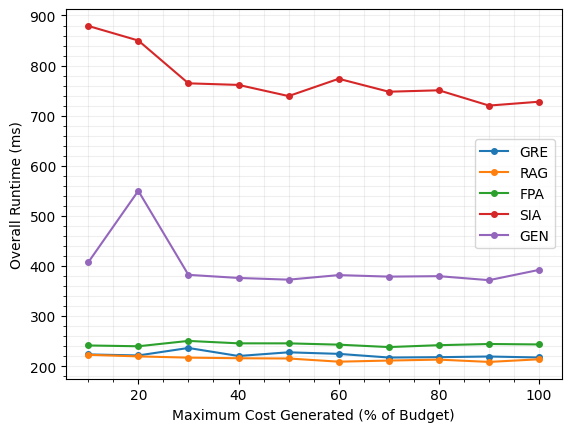

In [10]:
# Plot the exact algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=[x*100 for x in x_axis],
    y_axes=evaluation.get_y_axes(approximation_results, approximation_algorithms, 2),
    x_label='Maximum Cost Generated (% of Budget)',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(approximation_algorithms),
    colors=evaluation.get_colors(approximation_algorithms),
    alphas=evaluation.get_alphas(approximation_algorithms),
    sizes=evaluation.get_sizes(approximation_algorithms),
)

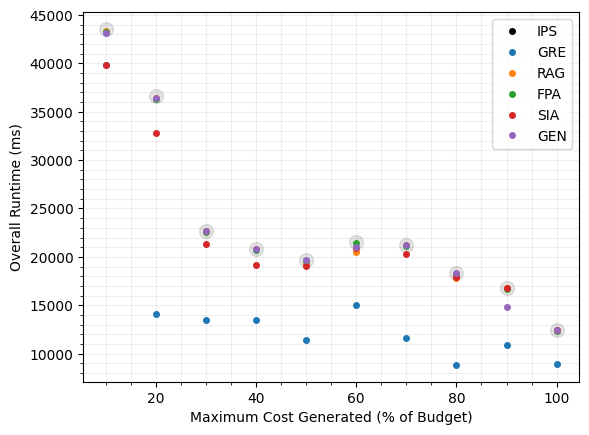

In [11]:
# Plot the approximation vs. exact algorithm values over the problems:
evaluation.plot_2d(
    x_axis=[x*100 for x in x_axis],
    y_axes=[evaluation.get_y_axis(exact_results, PBSingleAlgorithm.ILP_SOLVER, 0)] + evaluation.get_y_axes(approximation_results, approximation_algorithms, 0),
    filter_x=1,
    x_label='Maximum Cost Generated (% of Budget)',
    y_label='Overall Runtime (ms)',
    marker='o',
    labels=['IPS'] + evaluation.get_labels(approximation_algorithms),
    colors=['black'] + evaluation.get_colors(approximation_algorithms),
    alphas=[0.1] + evaluation.get_alphas(approximation_algorithms),
    sizes=[10] + evaluation.get_sizes(approximation_algorithms),
)